# Zhengxu Wang
zhengxu@bu.edu

### Use tweepy to access the tweet platform to obtain data, and the query statement restricts the language and content. A total of 10,000 pieces of data are acquired and saved as csv

In [2]:
import tweepy
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAGl1hAEAAAAAvHDZpENUinmoaM3e1EdQTyxEbtI%3D2SjBFtQBWxin1ZHoIXazuE22fNEvzdO3D3aTnzhfLS4pr1HWI3')

In [3]:
query = 'nft lang:en -has:links -is:retweet'
tweets = list(tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields='created_at', max_results=100).flatten(limit=10000))

In [4]:
len(tweets)

10000

In [24]:
import csv

driveFolderDirectory = './'
savedFileName = 'tweets.csv'
pathToSave = driveFolderDirectory + savedFileName

with open(pathToSave, 'w', newline='') as csvfile:
  fieldnames = ['idx','tweetId', 'tweetText', 'created_at']
  writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
  writer.writeheader()
  for i,tweet in enumerate(tweets):
    writer.writerow({
        'idx': i, 
        'tweetId': tweet.id,
        'tweetText': tweet.data['text'], 
        'created_at': tweet.data['created_at']})

### Read data from csv file as dictionary type

In [7]:
tweetList = []
with open('./tweets.csv') as f:
    file = csv.DictReader(f)
    for row in file:
        tweetList.append(row)

In [9]:
tweetList[0:5]

[{'idx': '0',
  'tweetId': '1572408558364528641',
  'tweetText': 'Reply an #ETH adress #NFT.  Like &amp; RT 😄',
  'created_at': '2022-09-21T02:13:08.000Z'},
 {'idx': '1',
  'tweetId': '1572408551494275073',
  'tweetText': 'Hello. Im looking for someone who selling NFT like ETH NFT. I will help you to sell your NFT through discord. Payment? We can talk about it. Just make sure your NFT is on Opensea. Thank you. DM mo for that. I know lots of people wants to buy ETH NFT.',
  'created_at': '2022-09-21T02:13:07.000Z'},
 {'idx': '2',
  'tweetId': '1572408549619429378',
  'tweetText': '@lemondrip_nft @opensea What is your floor price send me DM on @NFTssaga',
  'created_at': '2022-09-21T02:13:06.000Z'},
 {'idx': '3',
  'tweetId': '1572408545009893377',
  'tweetText': '@lotta_NFT 0x7b861D0af5CD0C765956d3a677A96B99aF4067FE',
  'created_at': '2022-09-21T02:13:05.000Z'},
 {'idx': '4',
  'tweetId': '1572408534784167941',
  'tweetText': '@nft_jem @amazyio When taking care of your health makes you 

### Convert all data to lowercase using re

In [142]:
import re
def lower_case(mapping):
    s = mapping.group(0).lower()
    t = f'{s}'
    return t

In [143]:
for i in range(len(tweetList)):
    tweetList[i]['tweetText'] = re.sub(r"([A-Z])", lower_case,tweetList[i]['tweetText'])

## Task 2

### remove numbers

In [144]:
for i in range(len(tweetList)):
    tweetList[i]['tweetText'] = re.sub(r"[0-9]+", '', tweetList[i]['tweetText'])

### remove URLs

In [145]:
for i in range(len(tweetList)):
    tweetList[i]['tweetText'] = re.sub(r'^(https:\S+)', ' ', tweetList[i]['tweetText'])
    tweetList[i]['tweetText'] = re.sub(r'[a-zA-Z]+://[^\s]*', '', tweetList[i]['tweetText'])

### remove hashtags

In [146]:
for i in range(len(tweetList)):
    tweetList[i]['tweetText'] = re.sub(r'([#][\w-]+)', '', tweetList[i]['tweetText'])

## Task3

### Remove the affixes -ing, -ed, and -ly from all words.

In [147]:
for i in range(len(tweetList)):
    wordList = re.split('(\W+)', tweetList[i]['tweetText'])
    tweetList[i]['tweetText'] = ''.join([re.sub('(ing|ed|ly)$', '', w) for w in wordList])

## Task 4

### Replace all forms of the verb “to be” with the stem be.

In [148]:
for i in range(len(tweetList)):
    tweetList[i]['tweetText'] = re.sub(' to be ', ' be ', tweetList[i]['tweetText'])
    wordList = re.split('(\W+)', tweetList[i]['tweetText'])
    tweetList[i]['tweetText'] = ''.join([re.sub('(being|been|am|is|are|was|were|will)$', 'be', w) for w in wordList])

## Task 5

### Remove all instances of the 10 most common words in English

In [150]:
for i in range(len(tweetList)):
    wordList = re.split('(\W+)', tweetList[i]['tweetText'])
    tweetList[i]['tweetText'] = ''.join([re.sub('(the|be|to|of|and|a|in|that|have|I)&', '', w) for w in wordList])

## Task 6
#### By analyzing the sentences I found there are lots of @somebody (mention someone), emojis, and hyperlinks. These are usually not a word. So I need to remove it to modify the corpus.

In [162]:
def cleanEmoji(desstr,restr=''):   
    try:  
        co = re.compile(u'['u'\U0001F300-\U0001F64F' u'\U0001F680-\U0001F6FF'u'\u2600-\u2B55]+')  
    except re.error:  
        co = re.compile(u'('u'\ud83c[\udf00-\udfff]|'u'\ud83d[\udc00-\ude4f\ude80-\udeff]|'u'[\u2600-\u2B55])+')  
    return co.sub(restr, desstr)

### The emoji codes in the text are as follows, and the emoji can be removed by removing the codes in the following ranges
<U+1F300> - <U+1F5FF>      Symbols and Pictograms  
<U+1F600> - <U+1F64F>      Emoticons  
<U+1F680> - <U+1F6FF>      Traffic symbols and map symbols  
<U+2600>  - <U+2B55>       other symbols

In [163]:
for i in range(len(tweetList)):
    tweetList[i]['tweetText'] = cleanEmoji(tweetList[i]['tweetText'])

In [164]:
for i in range(len(tweetList)):
    tweetList[i]['tweetText'] = re.sub(r'([@|&][\w-]+)', '', tweetList[i]['tweetText'])

## Task 7

### Using space punctuation and punctuation terminators($), a Twitter text is divided into sentences, and then the sentences are divided into words using space, and blank characters and non-letter characters are removed during the traversal process.

In [166]:
corpus = []
for i in range(len(tweetList)):
    corpus.append(tweetList[i]['tweetText'])

In [228]:
sentences = []
for i in range(len(corpus)):
    cutList = re.split(r"(\. |\! |\? |\.$|\!$|\?$)", corpus[i])
    for j in range(len(cutList)):
        cutList[j] = re.sub('(\W+)( )|\.$|\!$|\?$', '', cutList[j])
    cutList = [q for q in cutList if q != ""]
    sentences += cutList

In [259]:
words = []
for i in range(len(sentences)):
    tmp = re.split(' ',sentences[i])
    tmp = [j for j in tmp if j != ""]
    for j in range(len(tmp)):
        tmp[j] = re.sub('(\W+)', '', tmp[j])
    words.append([j for j in tmp if j != ""])
words = [j for j in words if j != []]

## Task 8

### After data cleaning, traverse each sentence and calculate the number of words in each sentence and clean empty sentences.

In [260]:
sentence_length = []
for word in words:
    sentence_length.append(len(word))

### Use set and dictionary to count the length and number of sentences. The statistical results are as follows, and sentences with 8 words are the most.

In [264]:
keys = set(sentence_length)

In [271]:
histDict = {}
for key in keys:
    histDict[str(key)] = 0

for value in sentence_length:
    histDict[str(value)] += 1

In [276]:
histDict.items()

dict_items([('1', 1246), ('2', 1208), ('3', 1212), ('4', 892), ('5', 758), ('6', 762), ('7', 543), ('8', 1739), ('9', 554), ('10', 423), ('11', 361), ('12', 518), ('13', 637), ('14', 214), ('15', 178), ('16', 238), ('17', 163), ('18', 159), ('19', 82), ('20', 84), ('21', 86), ('22', 206), ('23', 132), ('24', 75), ('25', 42), ('26', 56), ('27', 35), ('28', 38), ('29', 28), ('30', 100), ('31', 28), ('32', 21), ('33', 25), ('34', 178), ('35', 26), ('36', 14), ('37', 11), ('38', 27), ('39', 14), ('40', 7), ('41', 12), ('42', 13), ('43', 6), ('44', 7), ('45', 13), ('46', 4), ('47', 16), ('48', 5), ('54', 1), ('56', 1)])

### Use the hist function in the matplotlib library to display a histogram of sentence length to display its distribution.

(array([1.246e+03, 1.208e+03, 1.212e+03, 8.920e+02, 7.580e+02, 7.620e+02,
        5.430e+02, 1.739e+03, 5.540e+02, 4.230e+02, 3.610e+02, 5.180e+02,
        6.370e+02, 2.140e+02, 1.780e+02, 2.380e+02, 1.630e+02, 1.590e+02,
        8.200e+01, 8.400e+01, 8.600e+01, 2.060e+02, 1.320e+02, 7.500e+01,
        4.200e+01, 5.600e+01, 3.500e+01, 3.800e+01, 2.800e+01, 1.000e+02,
        2.800e+01, 2.100e+01, 2.500e+01, 1.780e+02, 2.600e+01, 1.400e+01,
        1.100e+01, 2.700e+01, 1.400e+01, 7.000e+00, 1.200e+01, 1.300e+01,
        6.000e+00, 7.000e+00, 1.300e+01, 4.000e+00, 1.600e+01, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.        ,  1.98214286,  2.96428571,  3.94642857,  4.92857143,
         5.91071429,  6.89285714,  7.875     ,  8.85714286,  9.83928571,
        10.82142857, 11.80357143, 12.78571429, 13.76785714, 14.75      ,
        15.73214286, 16.71428571, 17.69642857, 18.67857143, 19.66071429,
        20

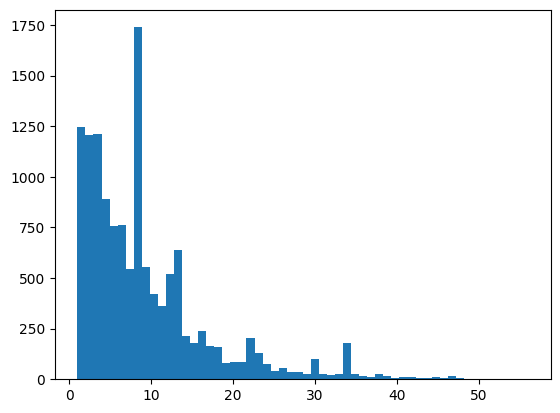

In [284]:
import matplotlib.pyplot as plt
plt.hist(sentence_length,bins=56)